In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
spambase_url = "https://raw.githubusercontent.com/AngeloCarrinho/DataPreparation-SpamDatabase/refs/heads/main/spambase.csv"

In [3]:
spambase_df = pd.read_csv(spambase_url)

In [4]:
spambase_df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [5]:
spambase_df.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [6]:
data_types = spambase_df.dtypes
print(data_types)

Unnamed: 0                      int64
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                  object
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                  object
word_freq_money               float64
word_freq_hp                  float64
word_freq_hp

**Check and Displaying the count of missing values for each column**

In [7]:
missing_values = spambase_df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

word_freq_all            6
word_freq_3d             2
word_freq_over           1
word_freq_internet      15
word_freq_addresses      9
word_freq_labs         250
word_freq_direct         3
word_freq_cs            14
word_freq_meeting        1
word_freq_table         40
dtype: int64


**Characterisation of the data set**

In [8]:
size = spambase_df.shape
size = {'Size': size}
print(size)

{'Size': (4601, 59)}


**Number of attributes**

In [9]:
num_columns = spambase_df.shape[1]
num_columns = {'Number of Columns': num_columns}
print(num_columns)

{'Number of Columns': 59}


**Has/does not have missing values**

In [10]:
missing_values = spambase_df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

word_freq_all            6
word_freq_3d             2
word_freq_over           1
word_freq_internet      15
word_freq_addresses      9
word_freq_labs         250
word_freq_direct         3
word_freq_cs            14
word_freq_meeting        1
word_freq_table         40
dtype: int64


Number of observations

In [11]:
num_observations = spambase_df.shape[0]
print('Number of observations:', num_observations)

Number of observations: 4601


What these Characterisation mean in the context of this data

Dataset have 4601 obervations and 59 variables, Dataset is of considerable large size enough to carry transactional information.

341 missing values in total among attributes indicate that some fields of the data points are blank, and hence this invariably
 might lead to great variation on analytics or predictions made over it
.
Before performing further analysis, it is very essential to handle the missing values as they may have otherwise affected our final result.


**Application of Data preparation/evaluation methods**

**(Cleaning, renaming, etc)**


Replace missing values

In [12]:
spambase_df.fillna(0, inplace=True)

**EDA visualizations**

**Data Preparation**

**Data filter: Separate spam messages from non-spam messages. (Foundation, 2024)**

In [13]:
spam_count = spambase_df[spambase_df['is_spam'] == True]['word_freq_free'].sum()
non_spam_count = spambase_df[spambase_df['is_spam'] == False]['word_freq_free'].sum()

**Counting Frequencies: Calculating How Often “FREE” Appears in Spam Messages**

In [14]:
labels = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

**Visualizations**

**Frequency of the Word "FREE" in Spam vs. Non-Spam Messages**

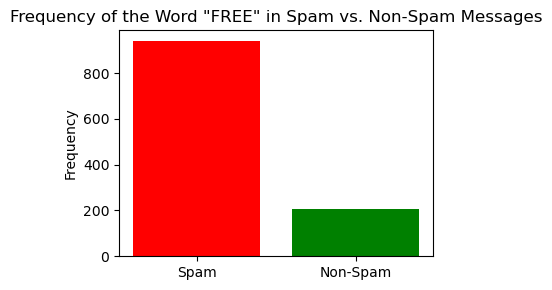

In [15]:
plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Frequency of the Word "FREE" in Spam vs. Non-Spam Messages')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Rationale**

**This visualization allows us to directly compare how often "FREE" appears in spam messages versus non-spam messages.** 

**It provides information on whether this word is a common indicator of spam.**

In [16]:
total_messages = len(spambase_df)
free_in_spam = spambase_df[spambase_df['is_spam'] == True]['word_freq_free'].apply(lambda x: x > 0).sum()
free_in_non_spam = spambase_df[spambase_df['is_spam'] == False]['word_freq_free'].apply(lambda x: x > 0).sum()

**% of Messages Containing the Word "FREE"**

In [17]:
percentage = [(free_in_spam / total_messages) * 100, (free_in_non_spam / total_messages) * 100]

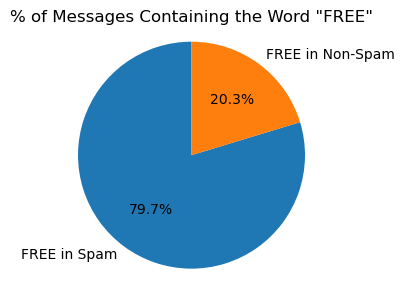

In [18]:
plt.figure(figsize=(4, 3))
plt.pie(percentage, labels=['FREE in Spam', 'FREE in Non-Spam'], autopct='%1.1f%%', startangle=90)
plt.title('% of Messages Containing the Word "FREE"')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

**Justification**

This graph provides information about the frequency distribution of the word "FREE" in spam messages.

*It shows the trend, helping us understand what percentage frequency the word "FREE" appears in spam messages.*

**Using PCA to establish the minimum number of features required to retain 99.5% variation in data**

In [19]:
spambase_df = spambase_df.apply(pd.to_numeric, errors='coerce')
spambase_df.dropna(inplace=True)

**Displaying the data types to identify potential non-numeric columns**

print(spambase_df.info())

**Explanation**

Loading the Data and Cleaning

*With this, I first load the dataset & do some cleaning by replacing no numeric values as well as dropping missing entries.*

In [20]:
spambase_df = pd.read_csv('spambase.csv')

**Data cleaning: Handle non-numeric values**

Replace '???' or any non-numeric strings with Not Number

In [21]:
spambase_df.replace(['???', 'none', ''], np.nan, inplace=True)
spambase_df = spambase_df.apply(pd.to_numeric, errors='coerce')

**Drop rows with Not a Number values**

In [22]:
spambase_df.dropna(inplace=True)

**Standardization**

Scaling the features to get a better PCA performance

In [23]:
X = spambase_df.drop('is_spam', axis=1)
y = spambase_df['is_spam']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fitting the PCA to the data in X and...

In [24]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Calculating the explained variance

In [25]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

**Plot of cumulative variance explained to determine the number of components needed**

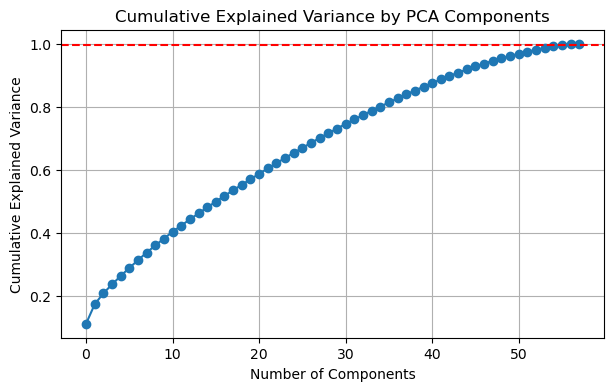

In [26]:
plt.figure(figsize=(7, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.995, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Dimensionality Reduction: Dimensionality reduction is a technique that compresses the data, under a certain number of components
to a fraction of its original size, which is necessary for the preservation of 99.5 % variance, leading to the removal of such 
predictors that are highly correlated with the data set.

**Determine the number of components for 99.5% variance**

In [27]:
n_components = np.argmax(cumulative_variance >= 0.995) + 1
print(f'Minimum number of components to retain 99.5% variance: {n_components}')

Minimum number of components to retain 99.5% variance: 56


**Reducing dimensionality**

In [28]:
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

**Displaying reduced data shape**

In [29]:
print(f'Reduced data shape: {X_reduced.shape}')

Reduced data shape: (4273, 56)


The "curse of dimensionality" refers back to the demanding situations that stand up while coping with excessive-dimensional statistics. 
As the number of functions (or dimensions) will increase, the spatial quantity grows exponentially and facts factors come to be greater sparse. 
This sparsity can result in issues which includes overfitting (in which the version learns the noise as opposed to the underlying patterns) and problems in visualizing and deciphering the data.

In the context of unsolicited mail evaluation, because of this if there are too many features, the version may also battle to generalize properly, 
that may cause terrible overall performance on unseen records. 
Reducing dimensionality therefore simplifies the information at the same time as preserving important information, thereby improving the accuracy and interpretability of the model.

**Only numeric columns are selected for PCA, as PCA requires numerical input.**

Impute Missing Values with 0:

In [30]:
missing_values = spambase_df.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

Series([], dtype: int64)


**Perform PCA**

PCA is done to reduce the data set to two important additives.

Creating a DataFrame with Core Components

In [31]:
X = spambase_df.drop(columns=['is_spam'])
y = spambase_df['is_spam']

In [32]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

**A new DataFrame pca_df is created containing the 2 fundamental components**

In [33]:
reduced_df = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])

**The target variable is_spam is passed to the PCA DataFrame to color the graph**

The target variable is_spam is delivered to the PCA DataFrame for coloring the plot

In [34]:
reduced_df['is_spam'] = y

**A scatterplot is created using Plotly to visualize the main components, colored via the is_spam variable**

This visualization allows us to understand how information points are distributed within the reduced dimensional, 
space and whether spam mail and unsolicited emails are separable based on available components.

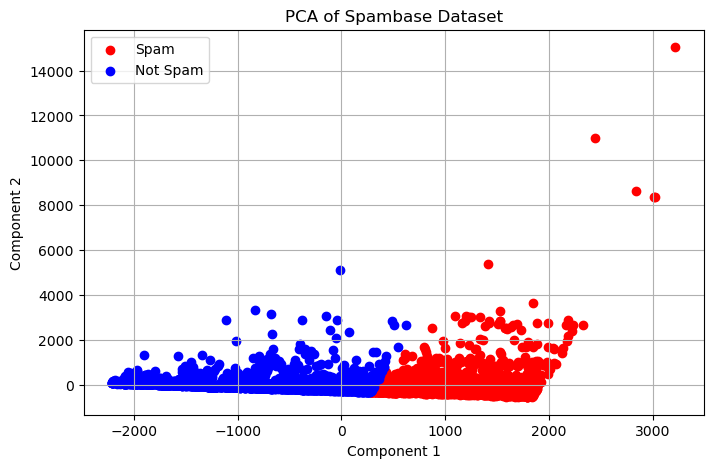

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(reduced_df[reduced_df['is_spam'] == 1]['PC1'], 
reduced_df[reduced_df['is_spam'] == 1]['PC2'],color='red', label='Spam')
plt.scatter(reduced_df[reduced_df['is_spam'] == 0]['PC1'],
reduced_df[reduced_df['is_spam'] == 0]['PC2'],
color='blue', label='Not Spam')
plt.title('PCA of Spambase Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid()
plt.show()